In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_yolu="/content/data (1).csv"
data=pd.read_csv(data_yolu)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Logistic Regression -Sınıflandırma Raporu:               precision    recall  f1-score   support

      Benign       0.96      0.99      0.98       107
   Malignant       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



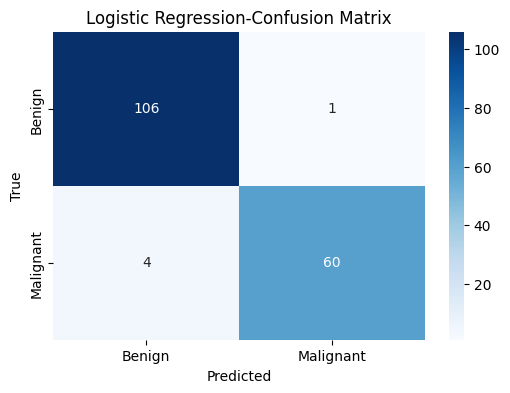

Decision Tree -Sınıflandırma Raporu:               precision    recall  f1-score   support

      Benign       0.90      0.95      0.93       107
   Malignant       0.91      0.83      0.87        64

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



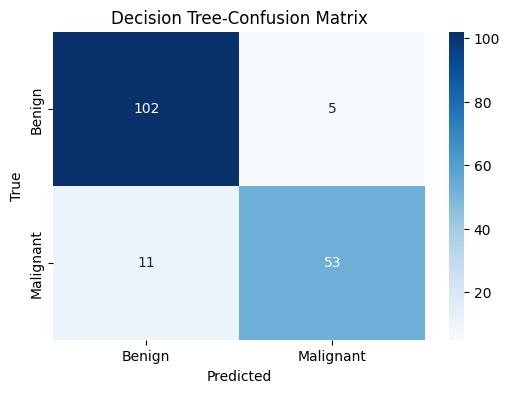

Random Forest -Sınıflandırma Raporu:               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97       107
   Malignant       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



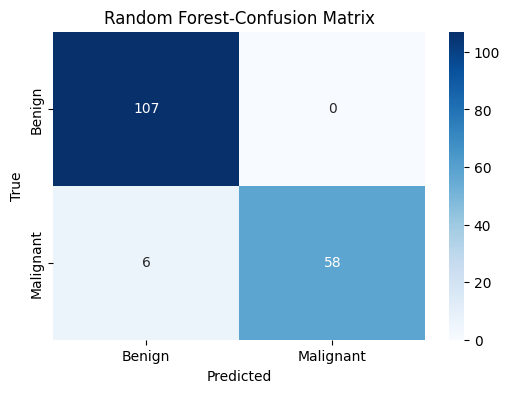

Gradient Boosting -Sınıflandırma Raporu:               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97       107
   Malignant       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



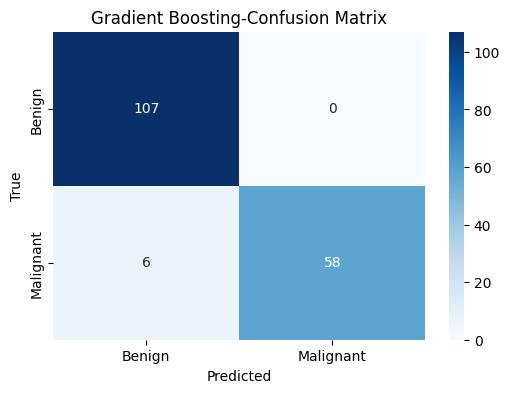

AdaBoost -Sınıflandırma Raporu:               precision    recall  f1-score   support

      Benign       0.97      1.00      0.99       107
   Malignant       1.00      0.95      0.98        64

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



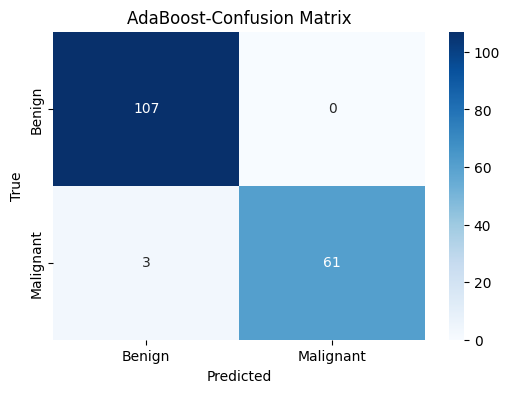

SVM -Sınıflandırma Raporu:               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97       107
   Malignant       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



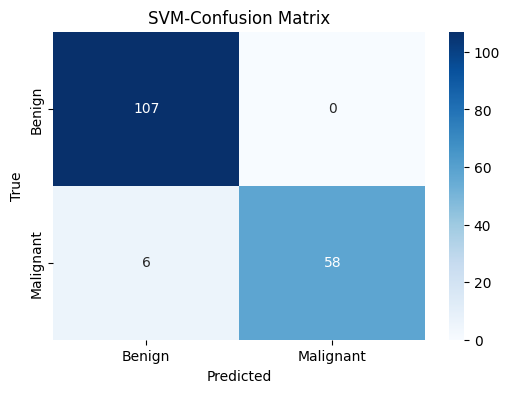

KNN -Sınıflandırma Raporu:               precision    recall  f1-score   support

      Benign       0.95      1.00      0.97       107
   Malignant       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



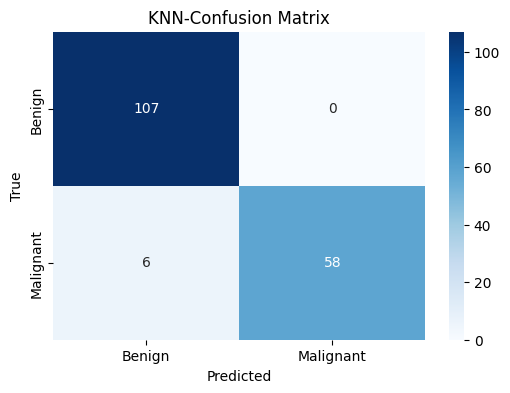

Naive Bayes -Sınıflandırma Raporu:               precision    recall  f1-score   support

      Benign       0.93      0.97      0.95       107
   Malignant       0.95      0.88      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



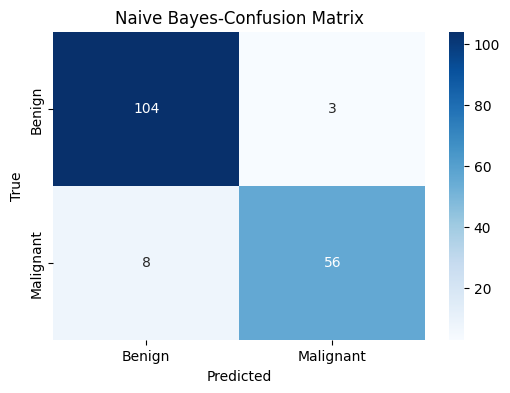

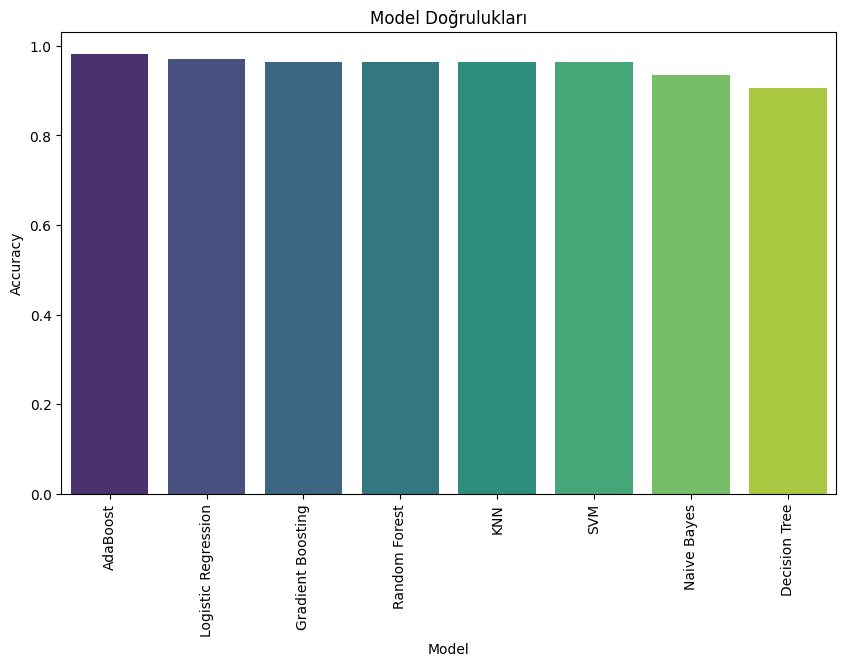

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#veri seti yükleme
data_yolu="/content/data (1).csv"
data=pd.read_csv(data_yolu)

#önişlem
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)
label_encoder=LabelEncoder()
data["diagnosis"]=label_encoder.fit_transform(data["diagnosis"])
X=data.drop("diagnosis",axis=1)
y=data["diagnosis"]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42,stratify=y)

#model kurulumu
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "SVM":SVC(),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB()
}
#model eğtimi ve sonuclar
doğruluk_listesi=[]
for model_name,model in models.items(): # Iterating over dictionary items
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  doğruluk=model.score(X_test,y_test)
  doğruluk_listesi.append((model_name,doğruluk))
  cm=confusion_matrix(y_test,y_pred)
  print(f"{model_name} -Sınıflandırma Raporu: {classification_report(y_test,y_pred,target_names=["Benign","Malignant"])}")
  plt.figure(figsize=(6,4))
  sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["Benign","Malignant"],yticklabels=["Benign","Malignant"])
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title(f"{model_name}-Confusion Matrix")
  plt.show()
#Doğruluk Değerleri çizdir
doğruluk_df=pd.DataFrame(doğruluk_listesi,columns=["Model","Accuracy"]).sort_values(by="Accuracy",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x="Model",y="Accuracy",data=doğruluk_df,palette="viridis", hue="Model", legend=False) # Updated to address FutureWarning
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Doğrulukları")
plt.xticks(rotation=90)
plt.show()

Enseble model ekleyın dedı hoca